In [191]:
import pandas as pd
import numpy as np

In [192]:
from google.colab import files
uploaded = files.upload()

Saving internet_data.csv to internet_data (2).csv
Saving churn_data.csv to churn_data (2).csv
Saving customer_data.csv to customer_data (2).csv


In [193]:
import io
churn_data = pd.read_csv(io.BytesIO(uploaded['churn_data.csv']))
customer_data = pd.read_csv(io.BytesIO(uploaded['customer_data.csv']))
internet_data= pd.read_csv(io.BytesIO(uploaded['internet_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [194]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [195]:
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [196]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [197]:
telecom.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,Male,0,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [198]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [199]:
#converting total charges to float
telecom["TotalCharges"]=pd.to_numeric(telecom["TotalCharges"],errors="coerce")

In [200]:
telecom.isnull().sum()#11 missing values in Total cahrges after changing to float

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [201]:
telecom.dropna(inplace=True)
telecom.isnull().sum()#null values removed 

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [202]:
#Univariate Analysis

In [203]:
categorial_data=telecom.select_dtypes("object")
categorial_data

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,One year,Yes,Mailed check,No,Male,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,One year,Yes,Credit card (automatic),No,Female,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No,Month-to-month,Yes,Electronic check,No,Female,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Month-to-month,Yes,Mailed check,Yes,Male,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [204]:
numerical_data=telecom.select_dtypes(np.number)
numerical_data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,0
3,45,42.30,1840.75,0
4,2,70.70,151.65,0
...,...,...,...,...
7038,24,84.80,1990.50,0
7039,72,103.20,7362.90,0
7040,11,29.60,346.45,0
7041,4,74.40,306.60,1


In [205]:
import gc
gc.collect()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

unique values are : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 8785-EPNCG    1
2812-ENYMO    1
9763-PDTKK    1
0895-LNKRC    1
6838-HVLXG    1
             ..
1534-OULXE    1
6440-DKQGE    1
4795-KTRTH    1
3746-EUBYR    1
1658-BYGOY    1
Name: customerID, Length: 7032, dtype: int64
unique values are : ['No' 'Yes']

 Yes    6352
No      680
Name: PhoneService, dtype: int64
unique values are : ['Month-to-month' 'One year' 'Two year']

 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
unique values are : ['Yes' 'No']

 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
unique values are : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
unique values are : ['No' 'Yes']

 No   

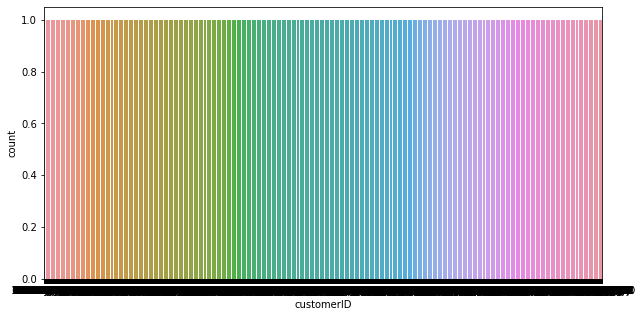

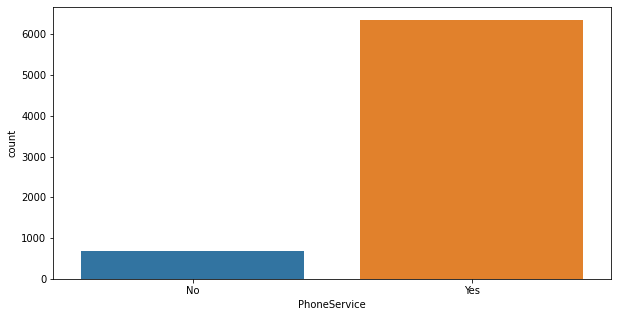

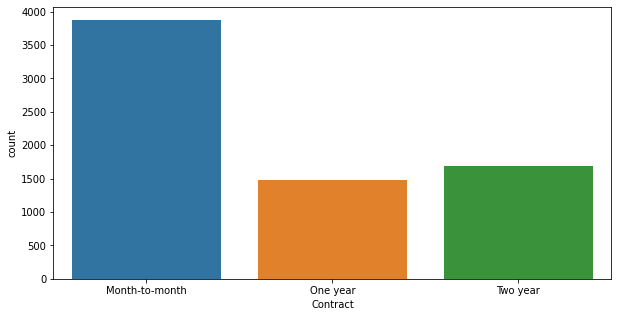

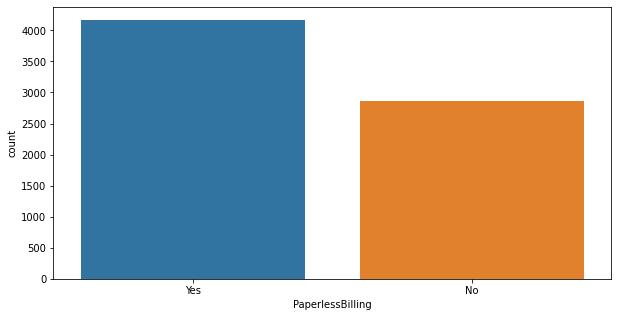

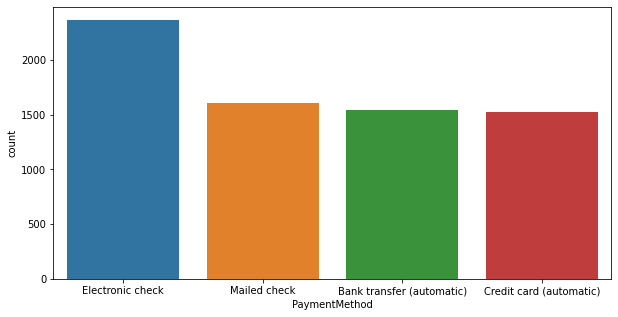

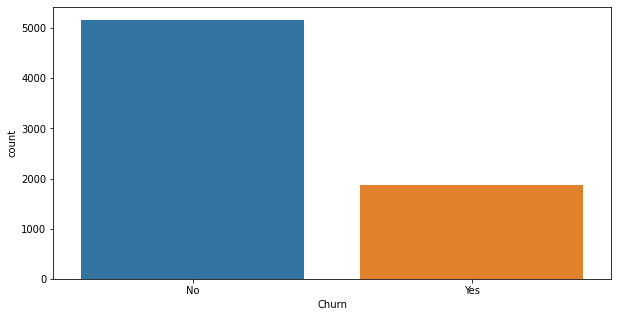

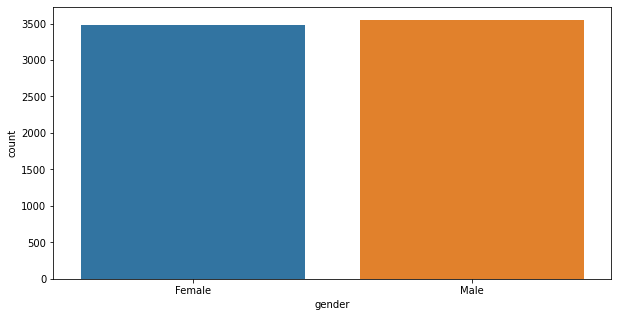

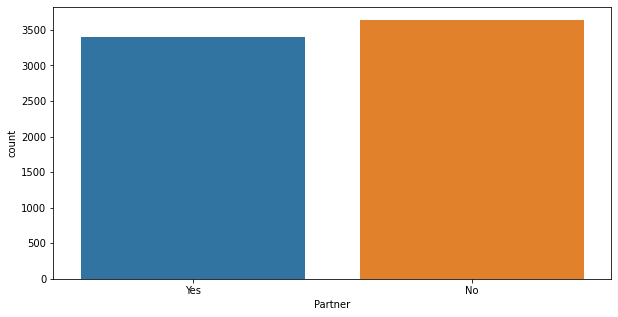

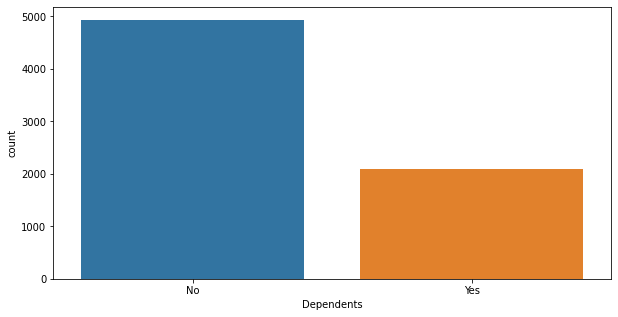

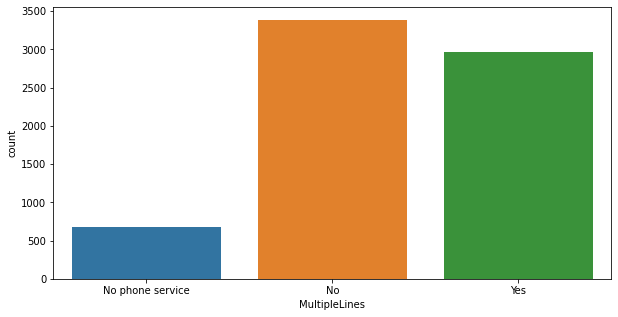

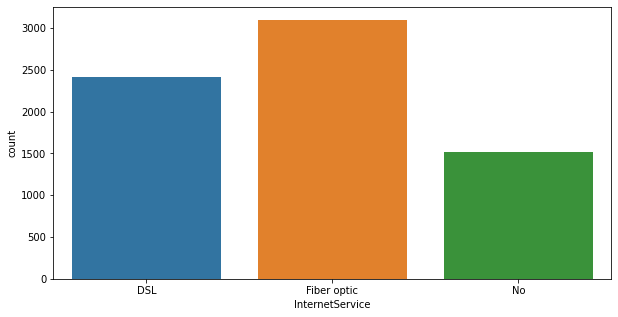

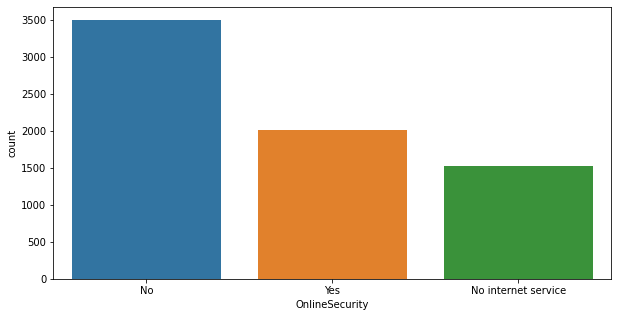

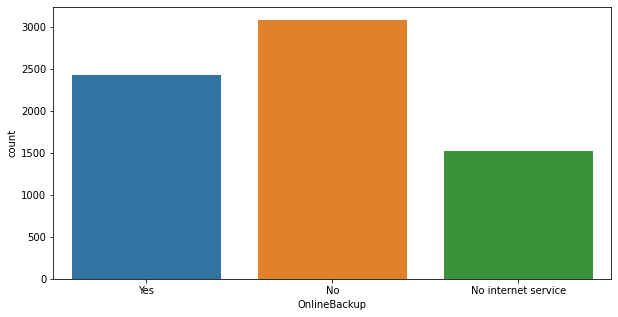

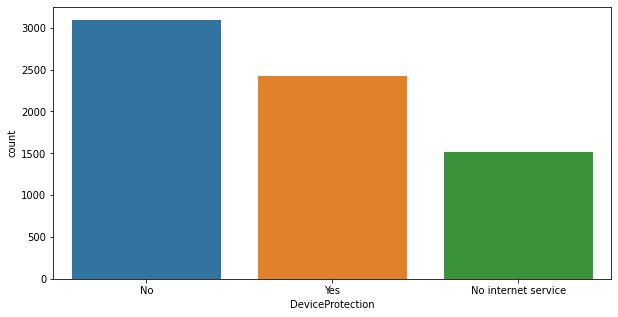

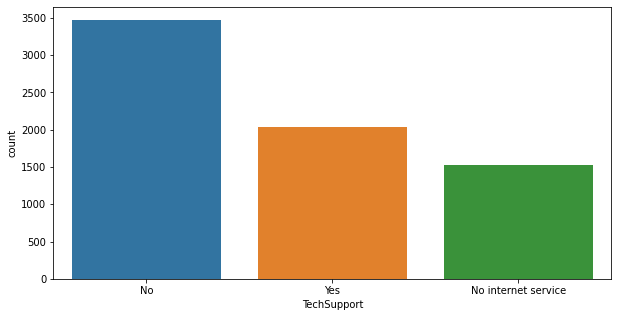

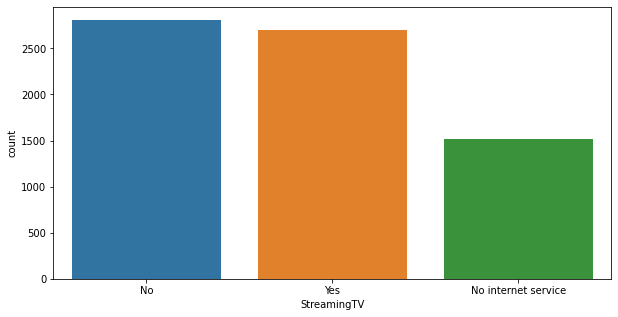

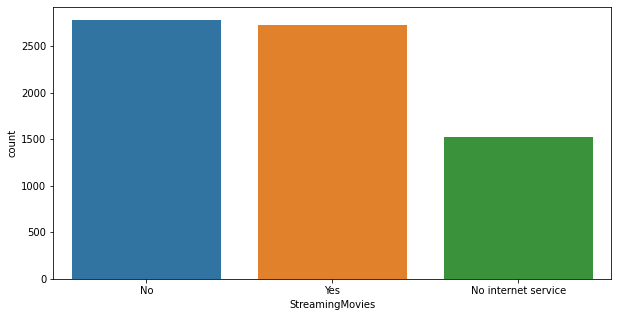

In [206]:
for i in categorial_data.columns:
    print("unique values are :",categorial_data[i].unique())
    print("\n",categorial_data[i].value_counts())
    plt.figure(figsize=(10,5))
    sns.countplot(categorial_data[i])#univariate analysis

In [207]:
"""#Observations:
1.Majority of  customers are using Phone Services.
2.Majority of customers are having Monthly Contract.
3.More customers are opting for PaperlessBilling.
4.Among paymnet method,Electronic check is the favorite one 
5.Very less count of customer who are likely to Churn can be observed,Data is imbalanced as well
6.Count of customers who dont have Partner is more
7.More count of customers are not dependents
8.Majority of customers are not using Multiplelines.
9.Fiber Optic in Internent service is favorite.
10.Many custromers has not opted for Onlinesecurity.
11.More count of customers are not usin OnlineBackup
12.More count of customers are not using DeviceProtection
13.More count of customers are not using TechSuport.
14.More count of customers are not using Streaming TV
15.Almost same number of customers are streaminng and not streaming movies
"""




'#Observations:\n1.Majority of  customers are using Phone Services.\n2.Majority of customers are having Monthly Contract.\n3.More customers are opting for PaperlessBilling.\n4.Among paymnet method,Electronic check is the favorite one \n5.Very less count of customer who are likely to Churn can be observed,Data is imbalanced as well\n6.Count of customers who dont have Partner is more\n7.More count of customers are not dependents\n8.Majority of customers are not using Multiplelines.\n9.Fiber Optic in Internent service is favorite.\n10.Many custromers has not opted for Onlinesecurity.\n11.More count of customers are not usin OnlineBackup\n12.More count of customers are not using DeviceProtection\n13.More count of customers are not using TechSuport.\n14.More count of customers are not using Streaming TV\n15.Almost same number of customers are streaminng and not streaming movies\n'

unique values are : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

 1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
unique values are : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

 20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: MonthlyCharges, Length: 1584, dtype: int64
unique values are : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

 20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64
unique values are : [0 1]

 0    5890
1    1142
Name: SeniorCitizen, dtype: 

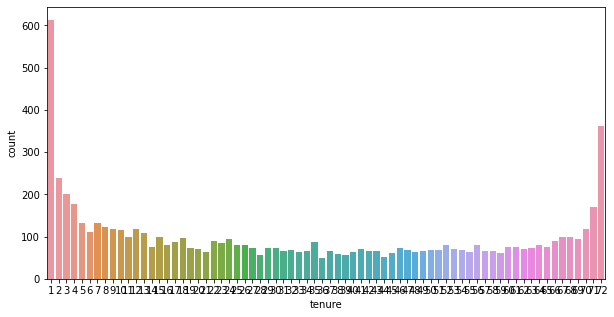

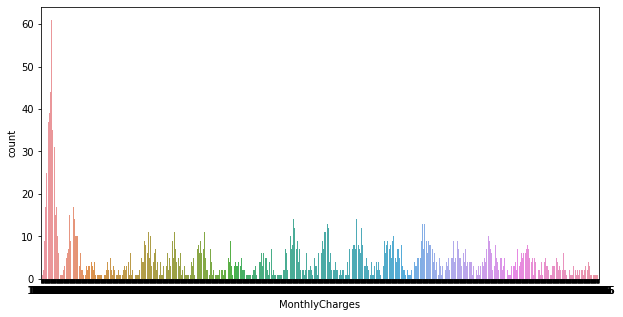

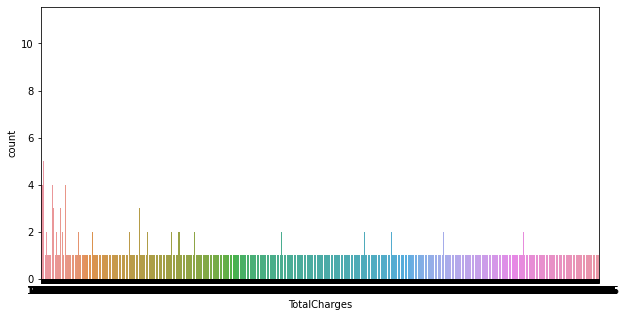

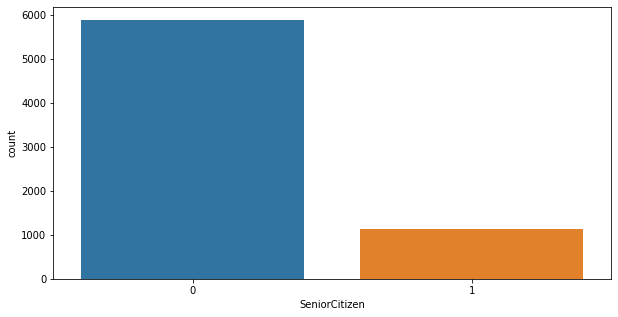

In [208]:
for i in numerical_data.columns:
    print("unique values are :",numerical_data[i].unique())
    print("\n",numerical_data[i].value_counts())
    plt.figure(figsize=(10,5))
    sns.countplot(numerical_data[i])

Text(0.5, 0, 'Tenure')

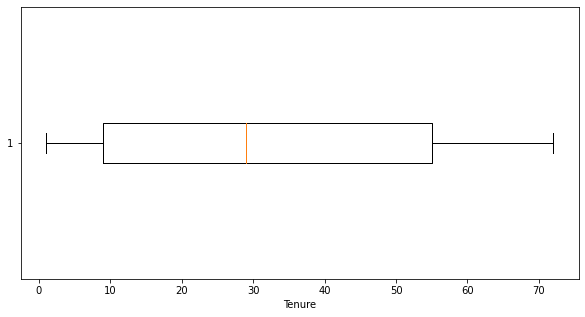

In [209]:
plt.figure(figsize=(10,5))
plt.boxplot(telecom["tenure"],vert=False)
plt.xlabel("Tenure")
#we  can observe that more 50% of people are less than almost 30 months tenured,and among them more people are less than one month tenured

Text(0.5, 0, 'MonthlyCharges')

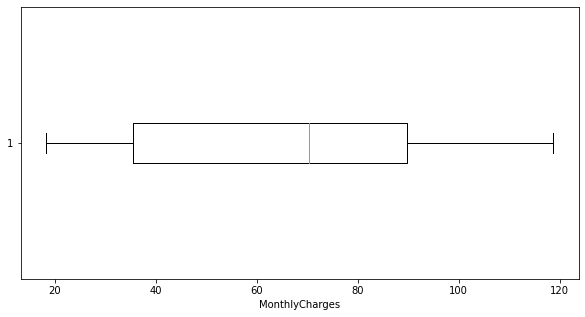

In [210]:
plt.figure(figsize=(10,5))
plt.boxplot(telecom["MonthlyCharges"],vert=False)
plt.xlabel("MonthlyCharges")
#50% of monthly recahrge is done for less than 70

Text(0.5, 0, 'MonthlyCharges')

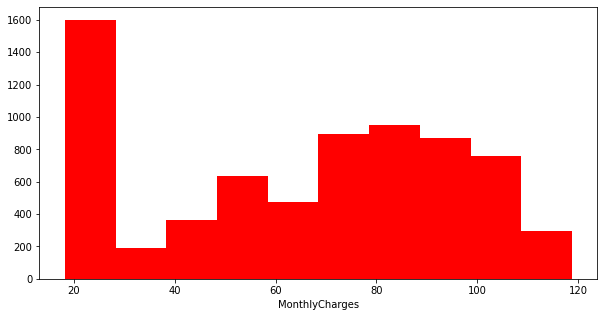

In [211]:
plt.figure(figsize=(10,5))
plt.hist(telecom["MonthlyCharges"],stacked=False,color="red")
plt.xlabel("MonthlyCharges")

Text(0.5, 0, 'TotalCharges')

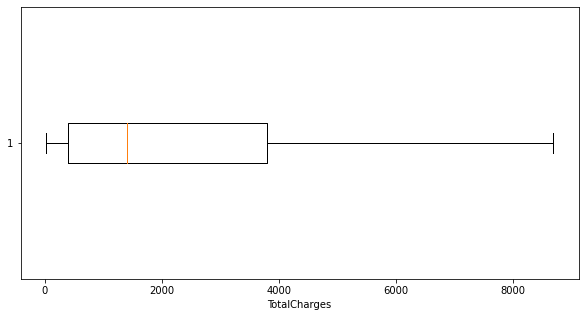

In [212]:
plt.figure(figsize=(10,5))
plt.boxplot(telecom["TotalCharges"],vert=False)
plt.xlabel("TotalCharges")

Text(0.5, 0, 'TotalCharges')

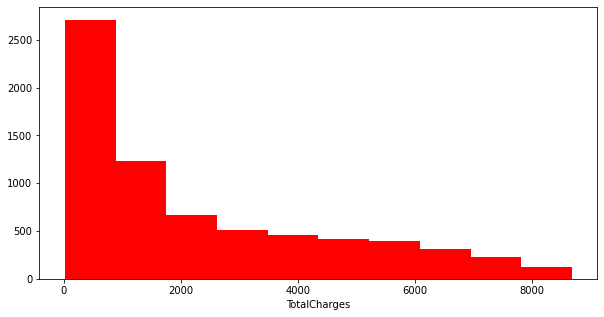

In [213]:
plt.figure(figsize=(10,5))
plt.hist(telecom["TotalCharges"],stacked=False,color="red")
plt.xlabel("TotalCharges")

In [214]:
#bivariate analysis

In [215]:
telecom.select_dtypes("object").columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'gender', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [216]:
def mapc(churn):
  if churn == "Yes":
    return churn.replace("Yes","1")
  else:
    return churn.replace("No","0")

telecom["Churn"]=telecom["Churn"].map(mapc)


In [217]:
telecom["Churn"]=telecom.Churn.astype("int")

In [218]:
telecom.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

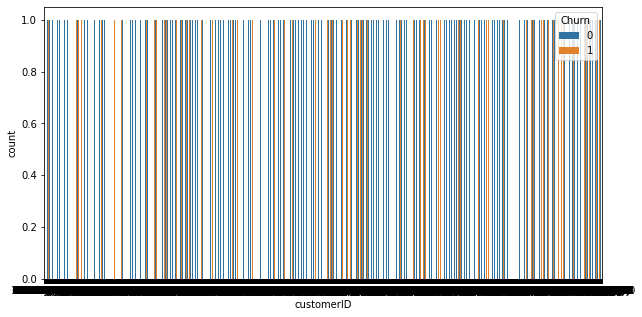

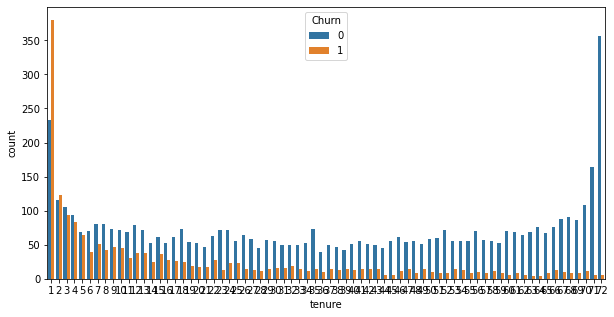

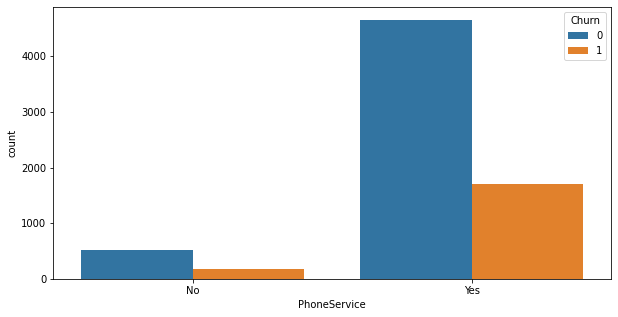

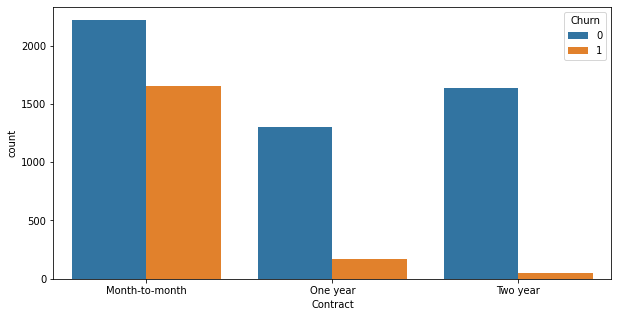

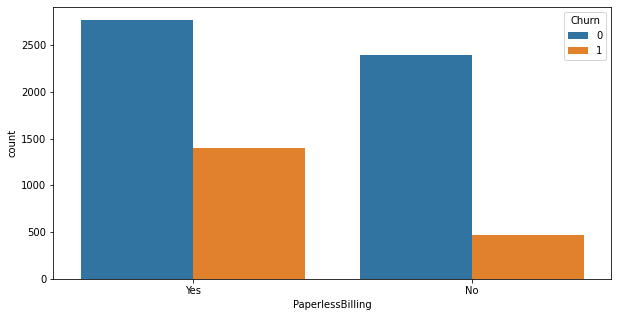

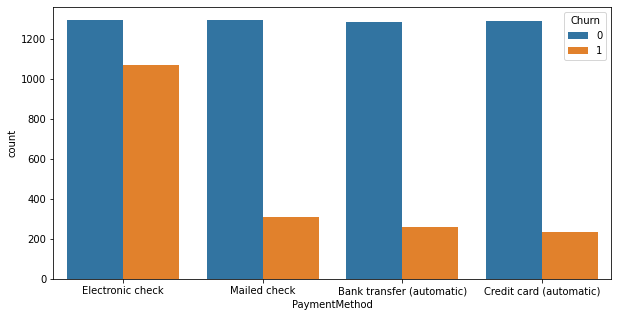

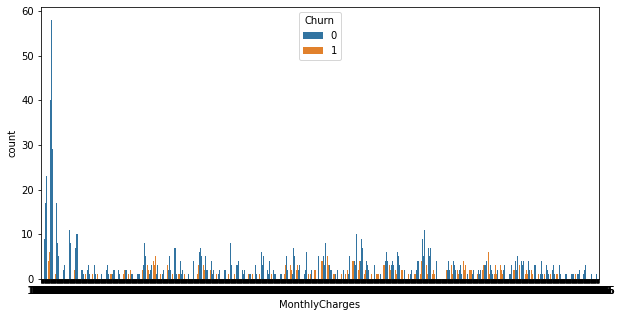

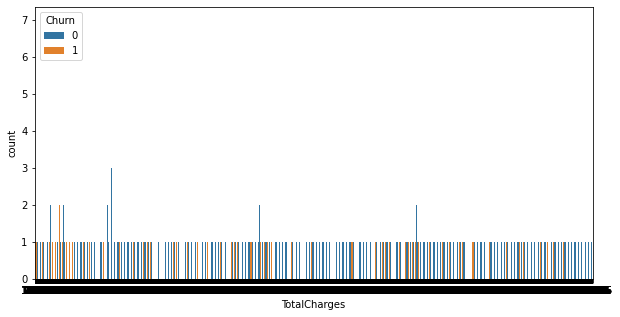

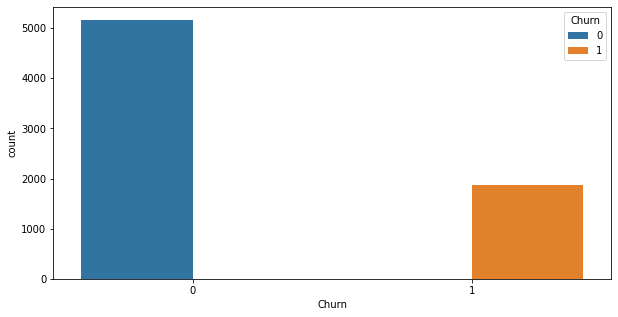

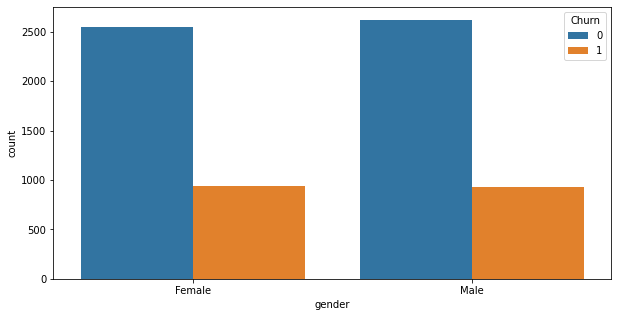

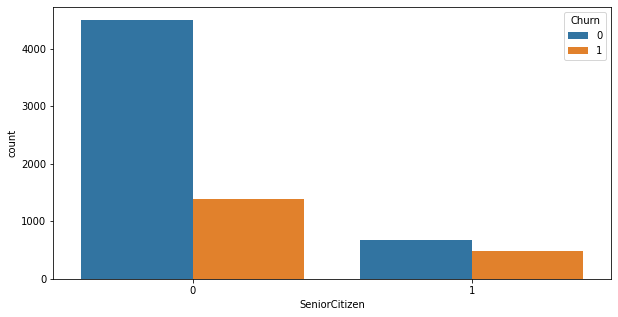

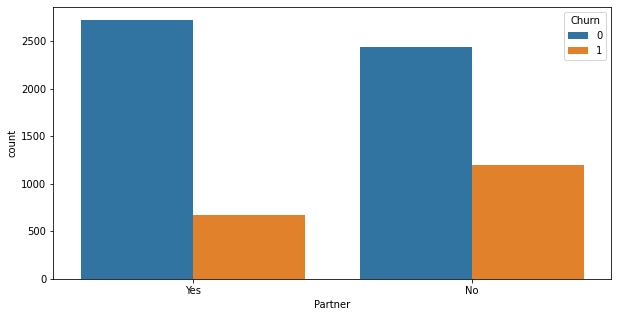

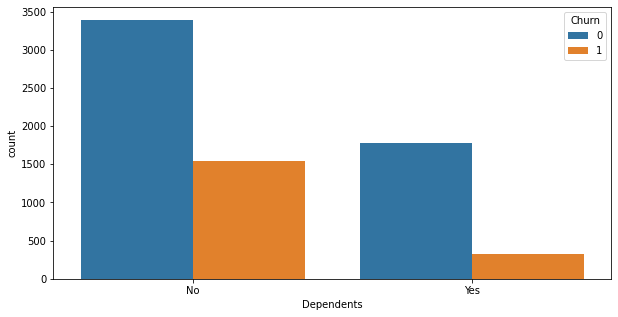

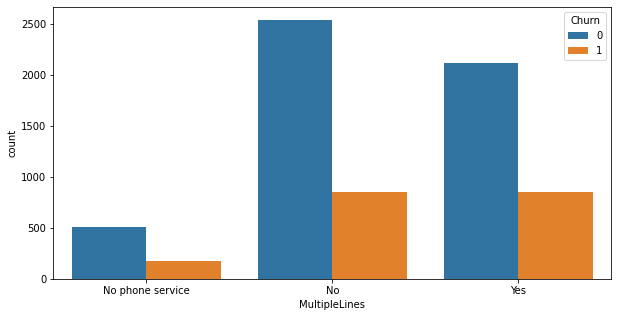

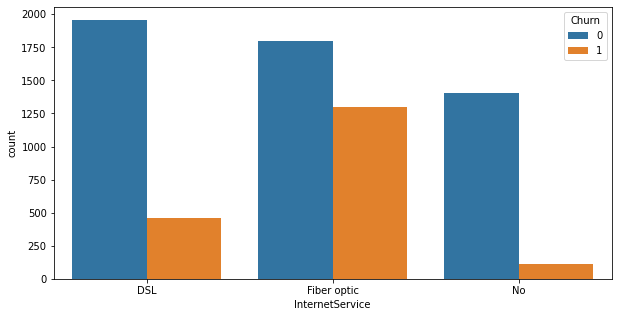

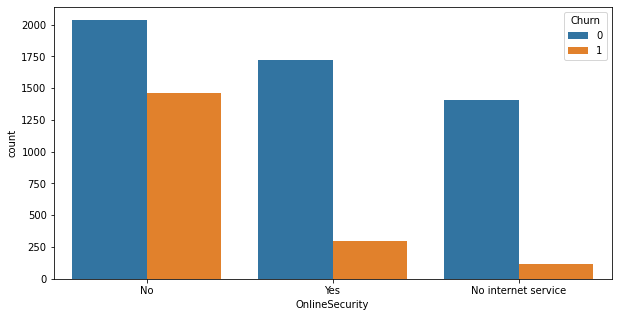

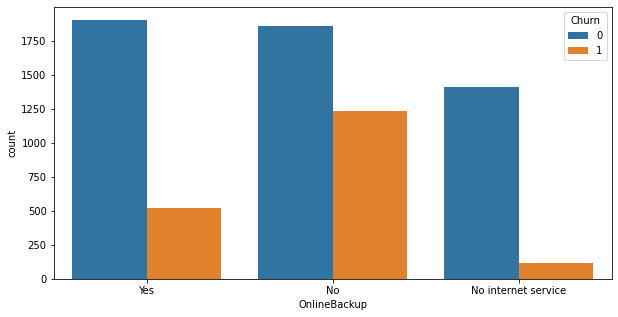

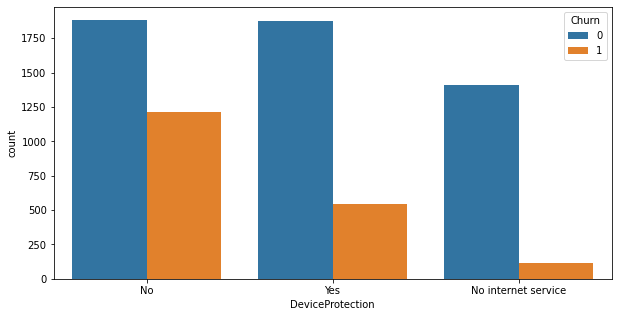

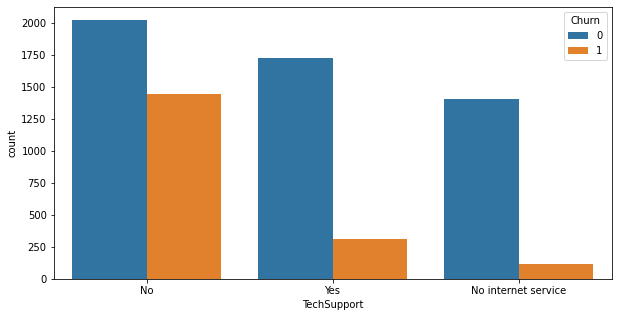

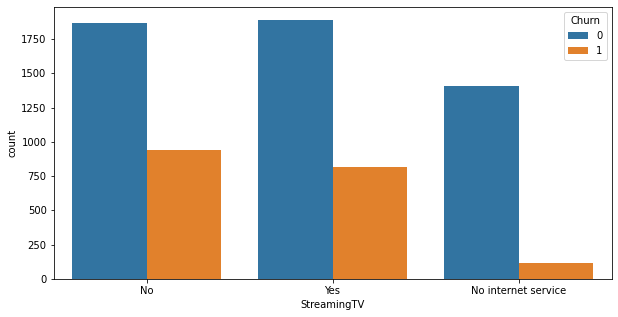

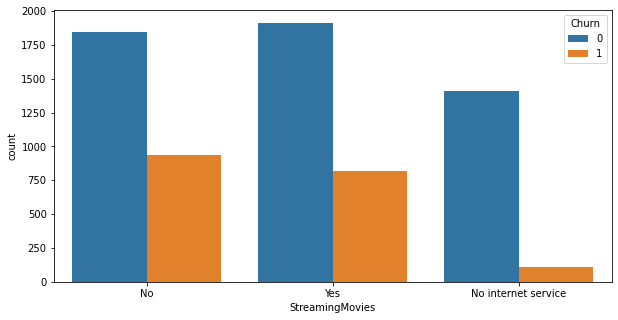

In [219]:
for i in telecom:
  plt.figure(figsize=(10,5))
  sns.countplot(telecom[i],hue=telecom["Churn"])
#we can observe the vislations w.r.t churn

Text(0, 0.5, 'tenure')

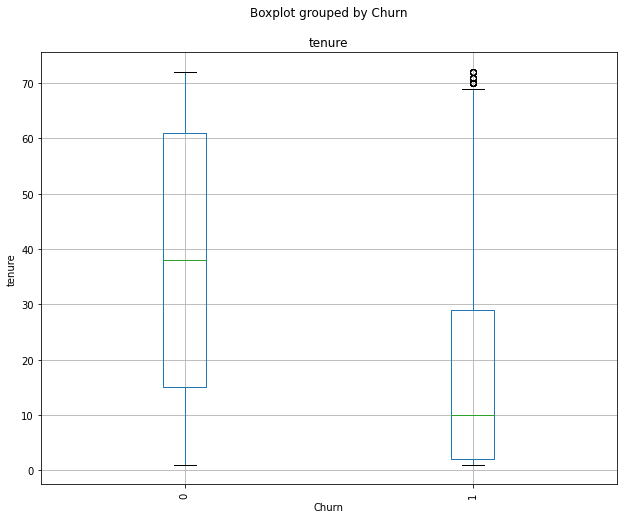

In [220]:
telecom.boxplot(column="tenure",by="Churn",figsize=(10,8),rot=90)
plt.ylabel("tenure")
#we can observe that 75% of people are more likely churn who are are tenured less thn 28 months

Text(0, 0.5, 'MonthlyCharges')

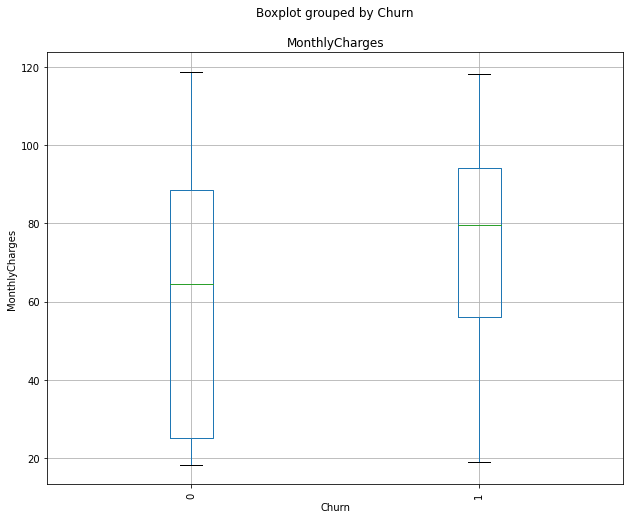

In [221]:
telecom.boxplot(column="MonthlyCharges",by="Churn",figsize=(10,8),rot=90)
plt.ylabel("MonthlyCharges")
#we can observe that more than 50% people are more likeliy to churn who are paying monthly charges  below 80

In [222]:
import warnings
warnings.filterwarnings("ignore")

Text(0, 0.5, 'TotalCharges')

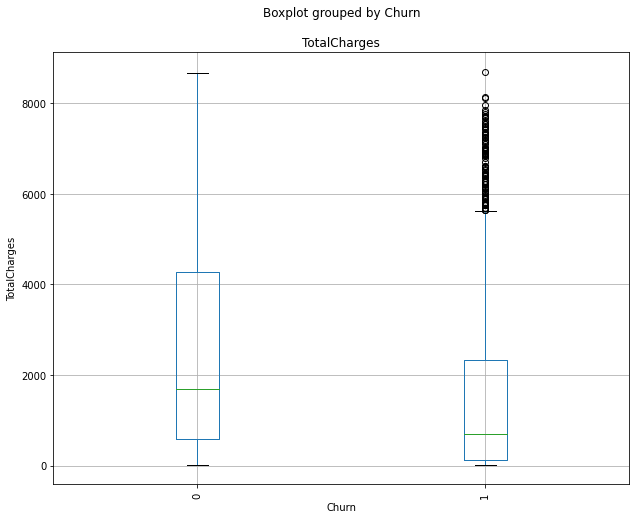

In [223]:
telecom.boxplot(column="TotalCharges",by="Churn",figsize=(10,8),rot=90)
plt.ylabel("TotalCharges")
#we can observe that majority of people who are paying  totalcharges of less than 5800 are more likely to churn,even though we can observe outliers too

In [224]:
telecom.corr()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen
tenure,1.000000,0.246862,0.825880,-0.354049,0.015683
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.219874
TotalCharges,0.825880,0.651065,1.000000,-0.199484,0.102411
Churn,-0.354049,0.192858,-0.199484,1.000000,0.150541
SeniorCitizen,0.015683,0.219874,0.102411,0.150541,1.000000


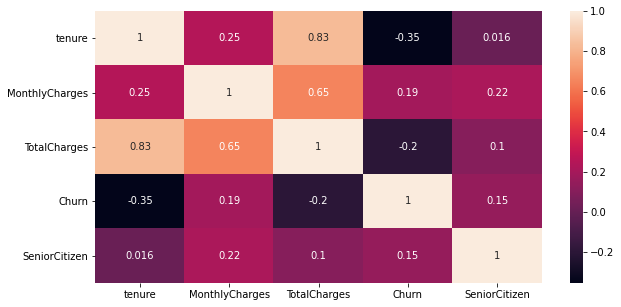

In [225]:
plt.figure(figsize=(10,5))
sns.heatmap(telecom.corr(),annot=True)
#we can observe that total charges and tenure are highly correlated,total charges and monthly charges are also highly correlated

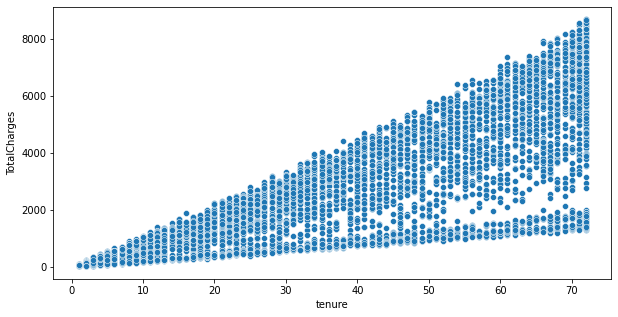

In [226]:
#totalcharges vs tenure
plt.figure(figsize=(10,5))
sns.scatterplot(x=telecom["tenure"],y=telecom["TotalCharges"])
#as tenure is increasing total charges are also increasing

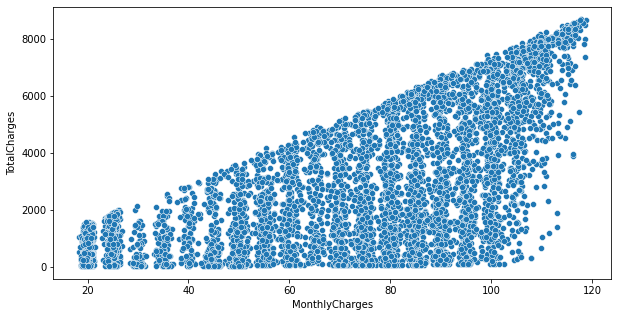

In [227]:
#totalcharges vs tenure
plt.figure(figsize=(10,5))
sns.scatterplot(x=telecom["MonthlyCharges"],y=telecom["TotalCharges"])
#WE CAN observe that as monthly charges are increasing,total charges are also increasing

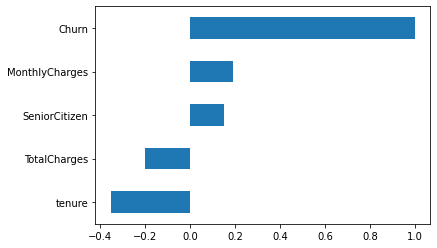

In [228]:
telecom.corr()["Churn"].sort_values().plot(kind="barh")
#not such high correlation wrt to churn but yes tenure has nearby -0.4 correlation w.r.t to churn

In [229]:
telecom.drop("customerID",axis=1,inplace=True)
telecom

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [230]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in telecom.select_dtypes("object"):
  telecom[i]=le.fit_transform(telecom[i])


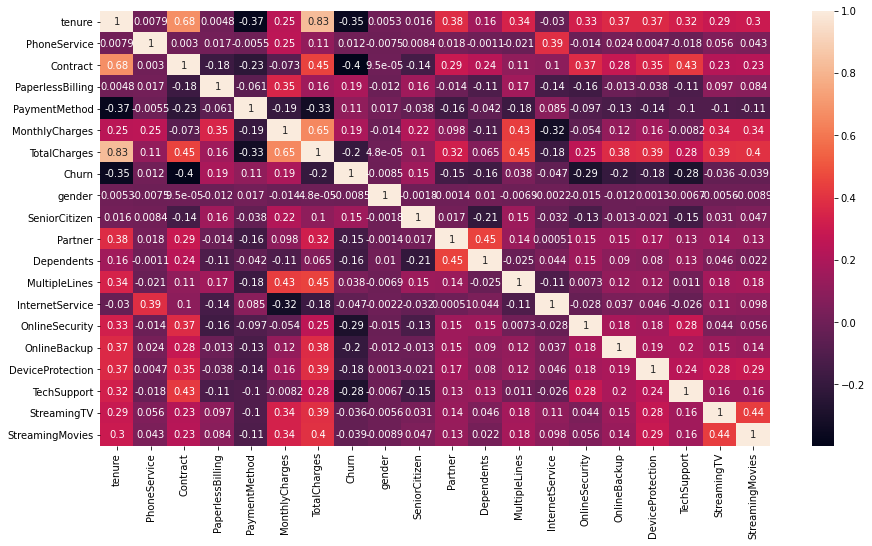

In [231]:
#we can observe high  correlations among features,we need to remove that to prepare model
plt.figure(figsize=(15,8))
sns.heatmap(telecom.corr(),annot=True)

In [232]:
gc.collect()
print(telecom["Churn"].value_counts()[1]/len(telecom.index),"%of churn data 1")
print(telecom["Churn"].value_counts()[0]/len(telecom.index),"%of churn data 0")
#data is imbalanced

0.26578498293515357 %of churn data 1
0.7342150170648464 %of churn data 0


In [233]:
X=telecom.drop("Churn",axis=1)
y=telecom[["Churn"]]

In [234]:
from sklearn.preprocessing import StandardScaler
X=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
X
#data is standardized

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,-1.280248,-3.056334,-0.826735,0.828939,0.399805,-1.161694,-0.994194,-1.009430,-0.440327,1.035617,-0.652305,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501
1,0.064303,0.327189,0.373926,-1.206361,1.336636,-0.260878,-0.173740,0.990658,-0.440327,-0.965608,-0.652305,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501
2,-1.239504,0.327189,-0.826735,0.828939,1.336636,-0.363923,-0.959649,0.990658,-0.440327,-0.965608,-0.652305,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501
3,0.512486,-3.056334,0.373926,-1.206361,-1.473857,-0.747850,-0.195248,0.990658,-0.440327,-0.965608,-0.652305,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501
4,-1.239504,0.327189,-0.826735,0.828939,0.399805,0.196178,-0.940457,-1.009430,-0.440327,-0.965608,-0.652305,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.327189,0.373926,0.828939,1.336636,0.664868,-0.129180,0.990658,-0.440327,1.035617,1.533025,1.116896,-1.183614,1.408012,-1.028998,1.245441,1.396963,1.146689,1.137564
7028,1.612573,0.327189,0.373926,0.828939,-0.537026,1.276493,2.241056,-1.009430,-0.440327,1.035617,1.533025,1.116896,0.172835,-0.917837,1.242875,1.245441,-0.924267,1.146689,1.137564
7029,-0.872808,-3.056334,-0.826735,0.828939,0.399805,-1.170004,-0.854514,-1.009430,-0.440327,1.035617,1.533025,0.062666,-1.183614,1.408012,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501
7030,-1.158016,0.327189,-0.826735,0.828939,1.336636,0.319168,-0.872095,0.990658,2.271039,1.035617,-0.652305,1.116896,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501


In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [237]:
from sklearn.decomposition import PCA
pca=PCA()

In [238]:
pca.fit_transform(X_train)#pca on train data

array([[-0.51704169, -0.53012795,  1.64685722, ..., -0.44428272,
         0.160868  ,  0.21120631],
       [-0.73811821, -0.3583017 ,  1.33563779, ...,  1.07145916,
        -0.09661734,  0.02778908],
       [-0.97319979,  1.15019351, -0.69489263, ...,  1.59047067,
        -0.31561646, -0.02547218],
       ...,
       [-1.91651481,  0.98200671,  0.43802344, ...,  0.04277391,
         0.55518483,  0.1521537 ],
       [-0.31387335, -1.8157056 , -1.08782838, ..., -0.52058012,
        -0.4032758 ,  0.26433489],
       [-1.56206063,  1.29064973, -0.0105697 , ...,  0.03424747,
         0.37091965,  0.0700698 ]])

In [239]:
pca.components_

array([[ 4.22174266e-01,  3.83521261e-02,  3.29942547e-01,
         3.14779356e-02, -2.00997288e-01,  2.33132295e-01,
         4.32967848e-01,  1.57148431e-03,  8.29760397e-03,
         2.26835385e-01,  1.13483552e-01,  2.14619413e-01,
        -3.45910711e-02,  1.87804440e-01,  2.22955244e-01,
         2.55553274e-01,  2.13632342e-01,  2.43866768e-01,
         2.47334508e-01],
       [-7.37440310e-02,  4.84376348e-02, -3.16010265e-01,
         3.80721172e-01, -6.70610757e-02,  4.74274721e-01,
         1.65226041e-01, -1.52827262e-02,  3.07246766e-01,
        -1.44933048e-01, -3.01967280e-01,  2.73753821e-01,
        -2.11181315e-01, -2.64478887e-01, -7.50578162e-02,
        -6.08011310e-02, -2.39679811e-01,  1.14555523e-01,
         1.20248040e-01],
       [ 8.20937372e-02, -5.84848204e-01,  4.09206740e-03,
         3.51723998e-02, -1.55717950e-01, -2.81786099e-02,
         4.27909171e-02,  2.13296384e-02, -3.18087089e-02,
         5.65168935e-02,  6.40406989e-02,  9.42781354e-02,
    

In [240]:
pca.explained_variance_ratio_

array([0.22092581, 0.12188567, 0.07936542, 0.06393858, 0.05596746,
       0.05318778, 0.04960213, 0.04520352, 0.04263524, 0.04122056,
       0.03800315, 0.03702857, 0.03662658, 0.03070299, 0.02998845,
       0.02437078, 0.01608289, 0.01039384, 0.00287059])

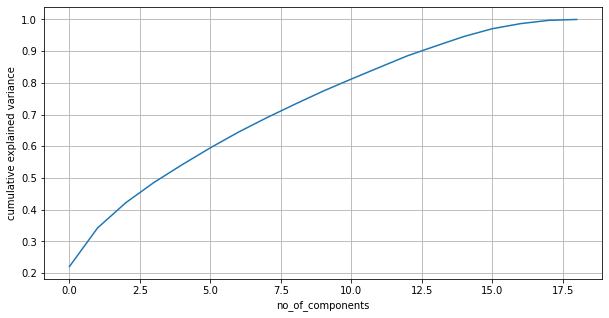

In [241]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no_of_components")
plt.ylabel("cumulative explained variance")
plt.grid()
#we can observe that almost 95% of variance is explained by 15 components

In [242]:
#preparing pca with 15 componensts
pca_last=PCA(n_components=16)
df_train=pca_last.fit_transform(X_train)

In [243]:
print(df_train.shape)

(4922, 16)


In [244]:
df_train

array([[-0.51704169, -0.53012795,  1.64685722, ...,  0.0251305 ,
         1.19132032, -0.51758678],
       [-0.73811821, -0.3583017 ,  1.33563779, ..., -0.1757182 ,
         0.17437276,  0.24660869],
       [-0.97319979,  1.15019351, -0.69489263, ..., -0.20614295,
        -0.86040755,  0.43189143],
       ...,
       [-1.91651481,  0.98200671,  0.43802344, ..., -0.01950853,
         0.62581646, -0.07926692],
       [-0.31387335, -1.8157056 , -1.08782838, ..., -0.07560657,
         0.00345984,  0.06519924],
       [-1.56206063,  1.29064973, -0.0105697 , ...,  0.11500162,
        -0.3870842 , -0.60416538]])

In [245]:
#applying pca_last to our test data as well 
df_test=pca_last.fit_transform(X_test)
df_test.shape

(2110, 16)

In [246]:
print(df_train.shape)
print(y_train.shape)
print(df_test.shape)
print(y_test.shape)


(4922, 16)
(4922, 1)
(2110, 16)
(2110, 1)


In [247]:
#balacing the imbalanced data using smoteomeck method
from imblearn.combine import SMOTETomek
smt=SMOTETomek()
x_smt,y_smt=smt.fit_sample(df_train,y_train)
print(x_smt.shape)
print(y_smt.shape)

(6828, 16)
(6828,)


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,auc,recall_score,f1_score,precision_score,recall_score,roc_curve

In [249]:
#using roc_auc matrix to check churn
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(),
      RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]

folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model_score=pd.DataFrame(columns=["Model","roc_auc_score"])
for m in model:
    m.fit(x_smt,y_smt)
    pred=m.predict(df_test)
    print("accuracy score of {} model is".format(m),roc_auc_score(y_test,pred),"\n")
    print("confusion matrix for{} model".format(m),"\n",confusion_matrix(y_test,pred))
    print("\n",classification_report(y_test,pred))
    print("------------------------------------------------------------------------------------")
    print("\n")
    model_score=model_score.append([{"Model":m,"roc_auc_score":roc_auc_score(y_test,pred)}],ignore_index=True)

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) model is 0.7283394841591782 

confusion matrix forLogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) model 
 [[1105  444]
 [ 144  417]]

               precision    recall  f1-score   support

           0       0.88      0.71      0.79      1549
           1       0.48      0.74      0.59       561

    accuracy                           0.72      2110
   macro avg       0.68  

In [250]:
model_score
#we can  observe that Logistic Regression models has highest roc_auc_score,so will choose LR

,Model,roc_auc_score
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.728339
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.626181
2,"GaussianNB(priors=None, var_smoothing=1e-09)",0.718984
3,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.705389
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.683968
5,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.689496
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.705292
7,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.722674
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.724500


In [251]:
#lets go with Lr
lr=LogisticRegression()
lr.fit(x_smt,y_smt.reshape(-1,1))
predict=lr.predict_proba(df_test)[:,1]
predict

array([0.03608702, 0.32962322, 0.87735595, ..., 0.04787599, 0.64608775,
       0.51262536])

In [252]:
roc_auc_score(y_test,predict)
#model is good

0.805235739462755

In [253]:
fpr, tpr, thresholds = roc_curve(y_test, predict)
thresholds

array([1.96459735, 0.96459735, 0.96004892, 0.95709859, 0.94991363,
       0.94934567, 0.94515717, 0.94435147, 0.9443104 , 0.94374128,
       0.94231802, 0.94191447, 0.94106255, 0.94002177, 0.93796762,
       0.93742282, 0.93642038, 0.93490943, 0.92838596, 0.92793891,
       0.92706653, 0.92701573, 0.92464749, 0.92456039, 0.92300884,
       0.92270529, 0.91906335, 0.91872376, 0.91866579, 0.91836281,
       0.91566385, 0.91549388, 0.91373029, 0.91254328, 0.91137053,
       0.91026781, 0.90835427, 0.90833891, 0.90668039, 0.90653027,
       0.90482373, 0.90465106, 0.90353255, 0.9012289 , 0.89713707,
       0.89697602, 0.89470458, 0.89200991, 0.890472  , 0.890451  ,
       0.88917465, 0.88901479, 0.88706662, 0.88669034, 0.88642457,
       0.88548725, 0.88205339, 0.88177986, 0.88135526, 0.88107277,
       0.88059149, 0.8804819 , 0.8802301 , 0.87854319, 0.87839865,
       0.87816939, 0.87780045, 0.87775875, 0.8776444 , 0.87757612,
       0.87703513, 0.87565647, 0.87491166, 0.87465135, 0.87431

Text(0, 0.5, 'TPR(Sensitivity)')

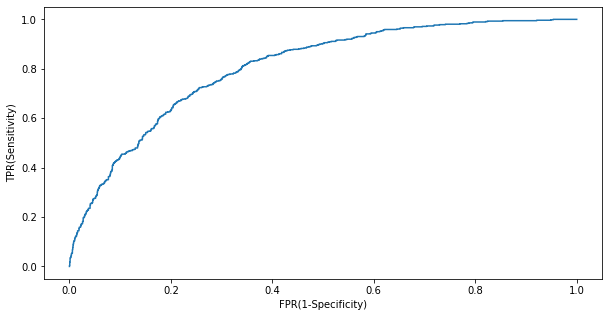

In [254]:
#ploting fpr vs tpr 
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
s=roc_auc_score(y_test,predict)
plt.xlabel("FPR(1-Specificity)")
plt.ylabel("TPR(Sensitivity)")

In [255]:
#lets tune the hyperparametres of logistic regression

In [256]:
lr=LogisticRegression()

In [257]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [258]:
folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid={"C":[0.001,0.01,0.1,0.5,1,2,10], "penalty":['l1', 'l2'],"max_iter":[50,100,200,300] }
grid=GridSearchCV(estimator=lr,scoring="roc_auc",cv=folds,param_grid=param_grid)
grid_result=grid.fit(x_smt,y_smt)

In [259]:
grid.best_params_#best parameters

{'C': 0.01, 'max_iter': 50, 'penalty': 'l2'}

In [260]:
#final model
lr=LogisticRegression(C= 0.01, max_iter= 50, penalty="l2")
lr.fit(x_smt,y_smt.reshape(-1,1))
predict=lr.predict_proba(df_test)[:,1]
predict

array([0.05219457, 0.34819527, 0.84889341, ..., 0.06879418, 0.61859429,
       0.51189562])

In [261]:
roc_auc_score(y_test,predict)
#we can observe that roc_auc score ahs been increased

0.8073485395097061

In [262]:
fpr, tpr, thresholds = roc_curve(y_test, predict)
thresholds

array([1.95242781, 0.95242781, 0.9457356 , 0.9440504 , 0.94138188,
       0.94052315, 0.92558607, 0.92540964, 0.92503109, 0.9248179 ,
       0.92174693, 0.92165329, 0.9202377 , 0.9198114 , 0.91756464,
       0.91616454, 0.91341945, 0.91261104, 0.91071645, 0.90941738,
       0.90481469, 0.90451285, 0.90360221, 0.90298294, 0.90229728,
       0.90198833, 0.90020367, 0.90005045, 0.89766364, 0.89708041,
       0.89498391, 0.89485111, 0.89483971, 0.89445625, 0.89434972,
       0.8941787 , 0.89415087, 0.89367967, 0.89352566, 0.89192253,
       0.89086861, 0.89065679, 0.89037681, 0.88960822, 0.8840039 ,
       0.88395302, 0.88159383, 0.88081118, 0.87582893, 0.87528326,
       0.87411118, 0.87364894, 0.87337815, 0.87323796, 0.87276539,
       0.87100054, 0.87037614, 0.8688312 , 0.86847944, 0.86821271,
       0.8678543 , 0.86683788, 0.86497065, 0.86434142, 0.86322147,
       0.86065303, 0.85963865, 0.85961021, 0.8593346 , 0.85768598,
       0.85693917, 0.8564614 , 0.85537959, 0.85533742, 0.85512

Text(0.5, 1.0, 'roc_auc_score is 0.8112369661756365')

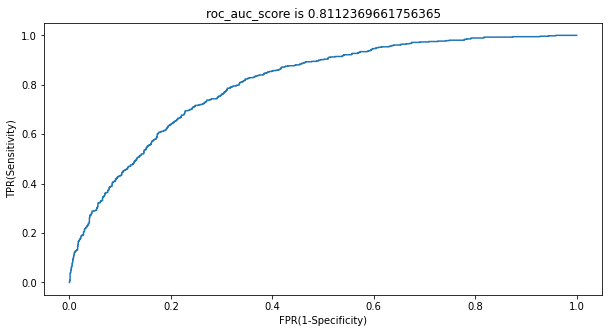

In [263]:
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
s=roc_auc_score(y_test,predict)
plt.xlabel("FPR(1-Specificity)")
plt.ylabel("TPR(Sensitivity)")
plt.title("roc_auc_score is 0.8112369661756365")